In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
import os
import warnings
import pandas_profiling as pp
warnings.filterwarnings('ignore')

In [2]:
cols = [
    'STATE/UT',
    'DISTRICT',
    'YEAR',
    'MURDER',
    'ATTEMPT TO MURDER',
    'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
    'RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
    'KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY',
    'ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING',
    'COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN',
    'CRUELTY BY HUSBAND OR HIS RELATIVES',
    'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'CAUSING DEATH BY NEGLIGENCE','OTHER IPC CRIMES','TOTAL IPC CRIMES'
]

In [3]:
ipc = pd.concat([
    pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv', usecols=cols),
    pd.read_csv('01_District_wise_crimes_committed_IPC_2013.csv', usecols=cols),
    

],ignore_index=True) #have to make sure that the index will not be duplicated

ipc

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,Lakshadweep,LAKSHADWEEP,2013,0,0,0,2,0,2,0,...,1,5,0,1,0,0,0,0,18,40
9836,Lakshadweep,ZZ TOTAL,2013,0,0,0,2,0,2,0,...,1,5,0,1,0,0,0,0,18,40
9837,Puducherry,KARAIKAL,2013,6,3,0,6,0,6,3,...,3,160,1,1,1,1,0,32,329,643
9838,Puducherry,PUDUCHERRY,2013,25,8,2,11,0,11,38,...,13,555,0,11,7,7,0,206,1464,3113


In [4]:
ipc.isnull().any()

STATE/UT                                               False
DISTRICT                                               False
YEAR                                                   False
MURDER                                                 False
ATTEMPT TO MURDER                                      False
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              False
RAPE                                                   False
CUSTODIAL RAPE                                         False
OTHER RAPE                                             False
KIDNAPPING & ABDUCTION                                 False
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            False
KIDNAPPING AND ABDUCTION OF OTHERS                     False
DACOITY                                                False
PREPARATION AND ASSEMBLY FOR DACOITY                   False
ROBBERY                                                False
BURGLARY                                               False
THEFT                   

In [5]:
#no null values in any attribute

In [6]:
ipc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT TO MURDER                                    9840 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL RAPE                                       9840 non-null   int64 
 8   OTHER RAPE                                           9840 non-null   int64 
 9

In [7]:
ipc.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,...,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,2007.161890,88.565854,78.738618,9.754878,55.456098,0.005488,55.450610,85.836992,64.184553,21.652439,...,25.012398,753.362805,20.179878,106.482520,27.772967,202.046138,0.187602,226.296951,2214.523171,5404.141463
std,3.755581,325.417692,306.650391,58.733349,201.690457,0.111218,201.676202,354.035359,278.536450,93.769371,...,97.601717,3059.322654,97.446611,423.729483,170.367098,869.325453,2.319261,952.900601,8199.391921,18941.271529
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.000000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,2.000000,...,2.000000,43.750000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,264.000000,857.750000
50%,2007.000000,37.000000,28.000000,2.000000,21.000000,0.000000,21.000000,26.000000,19.000000,5.000000,...,8.000000,199.000000,5.000000,33.000000,2.000000,49.000000,0.000000,70.000000,750.000000,2130.500000
75%,2010.000000,66.000000,57.000000,6.000000,43.000000,0.000000,43.000000,60.000000,46.000000,14.000000,...,19.000000,533.250000,16.000000,80.000000,13.000000,139.250000,0.000000,180.000000,1631.000000,4025.000000
max,2013.000000,7601.000000,7964.000000,1616.000000,4335.000000,5.000000,4335.000000,11183.000000,9737.000000,2685.000000,...,2830.000000,60488.000000,2335.000000,8252.000000,4970.000000,19865.000000,83.000000,16076.000000,127850.000000,234385.000000


In [8]:
ipc['rape_victims']= ipc['RAPE']+ipc['CUSTODIAL RAPE'] + ipc['OTHER RAPE']

In [9]:
ipc

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,rape_victims
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,100
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,46
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,54
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,40
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,Lakshadweep,LAKSHADWEEP,2013,0,0,0,2,0,2,0,...,5,0,1,0,0,0,0,18,40,4
9836,Lakshadweep,ZZ TOTAL,2013,0,0,0,2,0,2,0,...,5,0,1,0,0,0,0,18,40,4
9837,Puducherry,KARAIKAL,2013,6,3,0,6,0,6,3,...,160,1,1,1,1,0,32,329,643,12
9838,Puducherry,PUDUCHERRY,2013,25,8,2,11,0,11,38,...,555,0,11,7,7,0,206,1464,3113,22


In [10]:
ipc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT TO MURDER                                    9840 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL RAPE                                       9840 non-null   int64 
 8   OTHER RAPE                                           9840 non-null   int64 
 9

In [11]:
g= pd.DataFrame(ipc.groupby(['YEAR'])['rape_victims'].sum().reset_index())

In [12]:
g

,YEAR,rape_victims
0,2001,64300
1,2002,65492
2,2003,63388
3,2004,72932
4,2005,73436
5,2006,77392
6,2007,82948
7,2008,85868
8,2009,85588
9,2010,88688


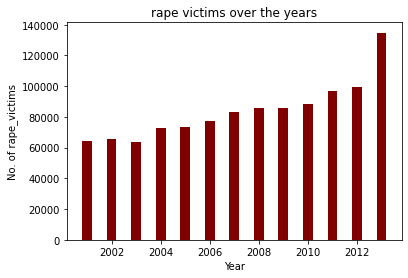

In [13]:
plt.bar(g['YEAR'], g['rape_victims'], color ='maroon',
        width = 0.4)
plt.xlabel("Year")
plt.ylabel("No. of rape_victims")
plt.title("rape victims over the years")
plt.show()


In [14]:
ipc['kid_abd_victims']= ipc['KIDNAPPING & ABDUCTION']+ipc['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'] + ipc['KIDNAPPING AND ABDUCTION OF OTHERS']
ipc

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,rape_victims,kid_abd_victims
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,16,149,34,175,0,181,1518,4154,100,92
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,7,118,24,154,0,270,754,4125,46,106
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,14,112,83,186,0,404,1262,5818,54,118
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,17,126,38,57,0,233,1181,3140,40,50
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,12,109,58,247,0,431,2313,6507,46,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,Lakshadweep,LAKSHADWEEP,2013,0,0,0,2,0,2,0,...,0,1,0,0,0,0,18,40,4,0
9836,Lakshadweep,ZZ TOTAL,2013,0,0,0,2,0,2,0,...,0,1,0,0,0,0,18,40,4,0
9837,Puducherry,KARAIKAL,2013,6,3,0,6,0,6,3,...,1,1,1,1,0,32,329,643,12,6
9838,Puducherry,PUDUCHERRY,2013,25,8,2,11,0,11,38,...,0,11,7,7,0,206,1464,3113,22,76


In [15]:
g1= pd.DataFrame(ipc.groupby(['YEAR'])['kid_abd_victims'].sum().reset_index())
g1

,YEAR,kid_abd_victims
0,2001,89948
1,2002,87400
2,2003,79968
3,2004,93308
4,2005,91328
5,2006,95964
6,2007,110244
7,2008,121044
8,2009,135440
9,2010,153760


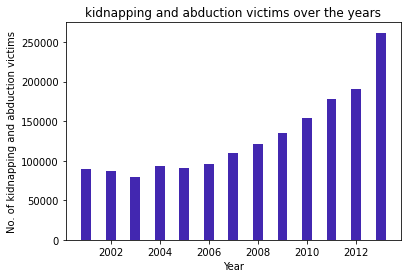

In [16]:
plt.bar(g1['YEAR'], g1['kid_abd_victims'], color ='#4227b0',
        width = 0.4)
plt.xlabel("Year")
plt.ylabel("No. of kidnapping and abduction victims")
plt.title("kidnapping and abduction victims over the years")
plt.show()

In [17]:
ipc['married_women_victims']= ipc['DOWRY DEATHS']+ipc['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'] + ipc['INSULT TO MODESTY OF WOMEN']+ipc['CRUELTY BY HUSBAND OR HIS RELATIVES']
ipc

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,rape_victims,kid_abd_victims,married_women_victims
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,149,34,175,0,181,1518,4154,100,92,374
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,118,24,154,0,270,754,4125,46,106,303
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,112,83,186,0,404,1262,5818,54,118,395
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,126,38,57,0,233,1181,3140,40,50,238
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,109,58,247,0,431,2313,6507,46,98,426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,Lakshadweep,LAKSHADWEEP,2013,0,0,0,2,0,2,0,...,1,0,0,0,0,18,40,4,0,1
9836,Lakshadweep,ZZ TOTAL,2013,0,0,0,2,0,2,0,...,1,0,0,0,0,18,40,4,0,1
9837,Puducherry,KARAIKAL,2013,6,3,0,6,0,6,3,...,1,1,1,0,32,329,643,12,6,4
9838,Puducherry,PUDUCHERRY,2013,25,8,2,11,0,11,38,...,11,7,7,0,206,1464,3113,22,76,25


In [18]:
g2= pd.DataFrame(ipc.groupby(['YEAR'])['married_women_victims'].sum().reset_index())
g2

,YEAR,married_women_victims
0,2001,199782
1,2002,200314
2,2003,204350
3,2004,219430
4,2005,218530
5,2006,234658
6,2007,267414
7,2008,284286
8,2009,295298
9,2010,306012


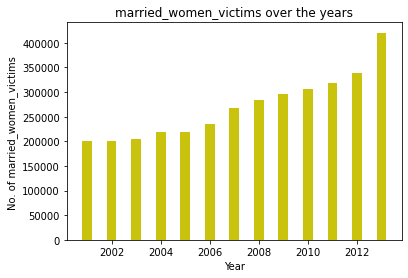

In [19]:
plt.bar(g2['YEAR'], g2['married_women_victims'], color ='#c9c30e',
        width = 0.4)
plt.xlabel("Year")
plt.ylabel("No. of married_women_victims ")
plt.title("married_women_victims over the years")
plt.show()

In [20]:
ipc['murder_cases']= ipc['MURDER']+ipc['ATTEMPT TO MURDER'] + ipc['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']
ipc

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,rape_victims,kid_abd_victims,married_women_victims,murder_cases
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,34,175,0,181,1518,4154,100,92,374,178
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,24,154,0,270,754,4125,46,106,303,277
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,83,186,0,404,1262,5818,54,118,395,160
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,38,57,0,233,1181,3140,40,50,238,134
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,58,247,0,431,2313,6507,46,98,426,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,Lakshadweep,LAKSHADWEEP,2013,0,0,0,2,0,2,0,...,0,0,0,0,18,40,4,0,1,0
9836,Lakshadweep,ZZ TOTAL,2013,0,0,0,2,0,2,0,...,0,0,0,0,18,40,4,0,1,0
9837,Puducherry,KARAIKAL,2013,6,3,0,6,0,6,3,...,1,1,0,32,329,643,12,6,4,9
9838,Puducherry,PUDUCHERRY,2013,25,8,2,11,0,11,38,...,7,7,0,206,1464,3113,22,76,25,35


In [21]:
g3= pd.DataFrame(ipc.groupby(['YEAR'])['murder_cases'].sum().reset_index())
g3

,YEAR,murder_cases
0,2001,142184
1,2002,138588
2,2003,125374
3,2004,130866
4,2005,128656
5,2006,126492
6,2007,126726
7,2008,130454
8,2009,130674
9,2010,133076


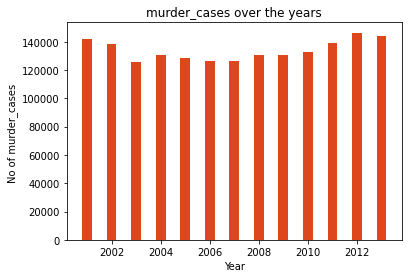

In [22]:
plt.bar(g3['YEAR'], g3['murder_cases'], color ='#de471d',
        width = 0.4)
plt.xlabel("Year")
plt.ylabel("No of murder_cases ")
plt.title("murder_cases over the years")
plt.show()

In [23]:
ipc['theft_cases']= ipc['DACOITY']+ipc['PREPARATION AND ASSEMBLY FOR DACOITY'] + ipc['ROBBERY']+ ipc['BURGLARY'] +ipc['THEFT'] + ipc['AUTO THEFT'] +ipc['OTHER THEFT']
ipc

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,rape_victims,kid_abd_victims,married_women_victims,murder_cases,theft_cases
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,175,0,181,1518,4154,100,92,374,178,646
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,154,0,270,754,4125,46,106,303,277,947
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,186,0,404,1262,5818,54,118,395,160,1701
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,57,0,233,1181,3140,40,50,238,134,449
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,247,0,431,2313,6507,46,98,426,150,2508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,Lakshadweep,LAKSHADWEEP,2013,0,0,0,2,0,2,0,...,0,0,0,18,40,4,0,1,0,18
9836,Lakshadweep,ZZ TOTAL,2013,0,0,0,2,0,2,0,...,0,0,0,18,40,4,0,1,0,18
9837,Puducherry,KARAIKAL,2013,6,3,0,6,0,6,3,...,1,0,32,329,643,12,6,4,9,135
9838,Puducherry,PUDUCHERRY,2013,25,8,2,11,0,11,38,...,7,0,206,1464,3113,22,76,25,35,1143


In [24]:
g4= pd.DataFrame(ipc.groupby(['YEAR'])['theft_cases'].sum().reset_index())
g4

,YEAR,theft_cases
0,2001,1268914
1,2002,1236182
2,2003,1216836
3,2004,1329378
4,2005,1323956
5,2006,1333412
6,2007,1376448
7,2008,1511066
8,2009,1540610
9,2010,1562338


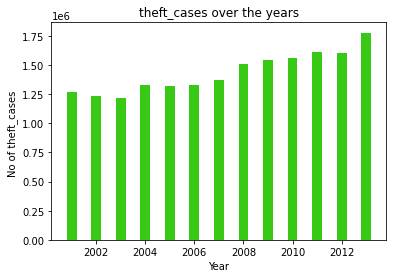

In [25]:
plt.bar(g4['YEAR'], g4['theft_cases'], color ='#37c916',
        width = 0.4)
plt.xlabel("Year")
plt.ylabel("No of theft_cases ")
plt.title("theft_cases over the years")
plt.show()

In [26]:
ipc.corr()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,rape_victims,kid_abd_victims,married_women_victims,murder_cases,theft_cases
YEAR,1.000000,-0.014588,0.002504,-0.007766,0.042352,-0.004074,0.042357,0.074994,0.087115,0.024376,...,0.057645,-0.022344,0.041719,0.024421,0.024087,0.042352,0.074994,0.045889,-0.006600,0.018093
MURDER,-0.014588,1.000000,0.957058,0.783331,0.804640,0.147950,0.804615,0.812158,0.769808,0.779709,...,0.709600,0.312656,0.799893,0.738281,0.847480,0.804640,0.812158,0.803064,0.989329,0.822697
ATTEMPT TO MURDER,0.002504,0.957058,1.000000,0.759504,0.775656,0.122452,0.775643,0.812462,0.775176,0.764913,...,0.668873,0.300088,0.773900,0.760012,0.836367,0.775656,0.812462,0.769268,0.986047,0.767230
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,-0.007766,0.783331,0.759504,1.000000,0.549934,0.071918,0.549933,0.713369,0.710435,0.583088,...,0.544761,0.164227,0.515726,0.440495,0.524913,0.549934,0.713369,0.594928,0.813215,0.515149
RAPE,0.042352,0.804640,0.775656,0.549934,1.000000,0.128440,1.000000,0.757015,0.744067,0.647978,...,0.774559,0.244380,0.730924,0.790613,0.860521,1.000000,0.757015,0.866656,0.791571,0.808915
CUSTODIAL RAPE,-0.004074,0.147950,0.122452,0.071918,0.128440,1.000000,0.127898,0.124048,0.113345,0.131671,...,0.096018,0.023984,0.115343,0.104741,0.123094,0.128440,0.124048,0.103846,0.133793,0.120269
OTHER RAPE,0.042357,0.804615,0.775643,0.549933,1.000000,0.127898,1.000000,0.757001,0.744057,0.647951,...,0.774561,0.244384,0.730912,0.790611,0.860514,1.000000,0.757001,0.866660,0.791553,0.808905
KIDNAPPING & ABDUCTION,0.074994,0.812158,0.812462,0.713369,0.757015,0.124048,0.757001,1.000000,0.984319,0.851734,...,0.744587,0.221615,0.708747,0.654288,0.746042,0.757015,1.000000,0.763678,0.826287,0.734857
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.087115,0.769808,0.775176,0.710435,0.744067,0.113345,0.744057,0.984319,1.000000,0.745951,...,0.747294,0.145580,0.709914,0.639756,0.724143,0.744067,0.984319,0.759092,0.788513,0.704179
KIDNAPPING AND ABDUCTION OF OTHERS,0.024376,0.779709,0.764913,0.583088,0.647978,0.131671,0.647951,0.851734,0.745951,1.000000,...,0.591465,0.404292,0.567183,0.569971,0.665729,0.647978,0.851734,0.628503,0.777495,0.682802


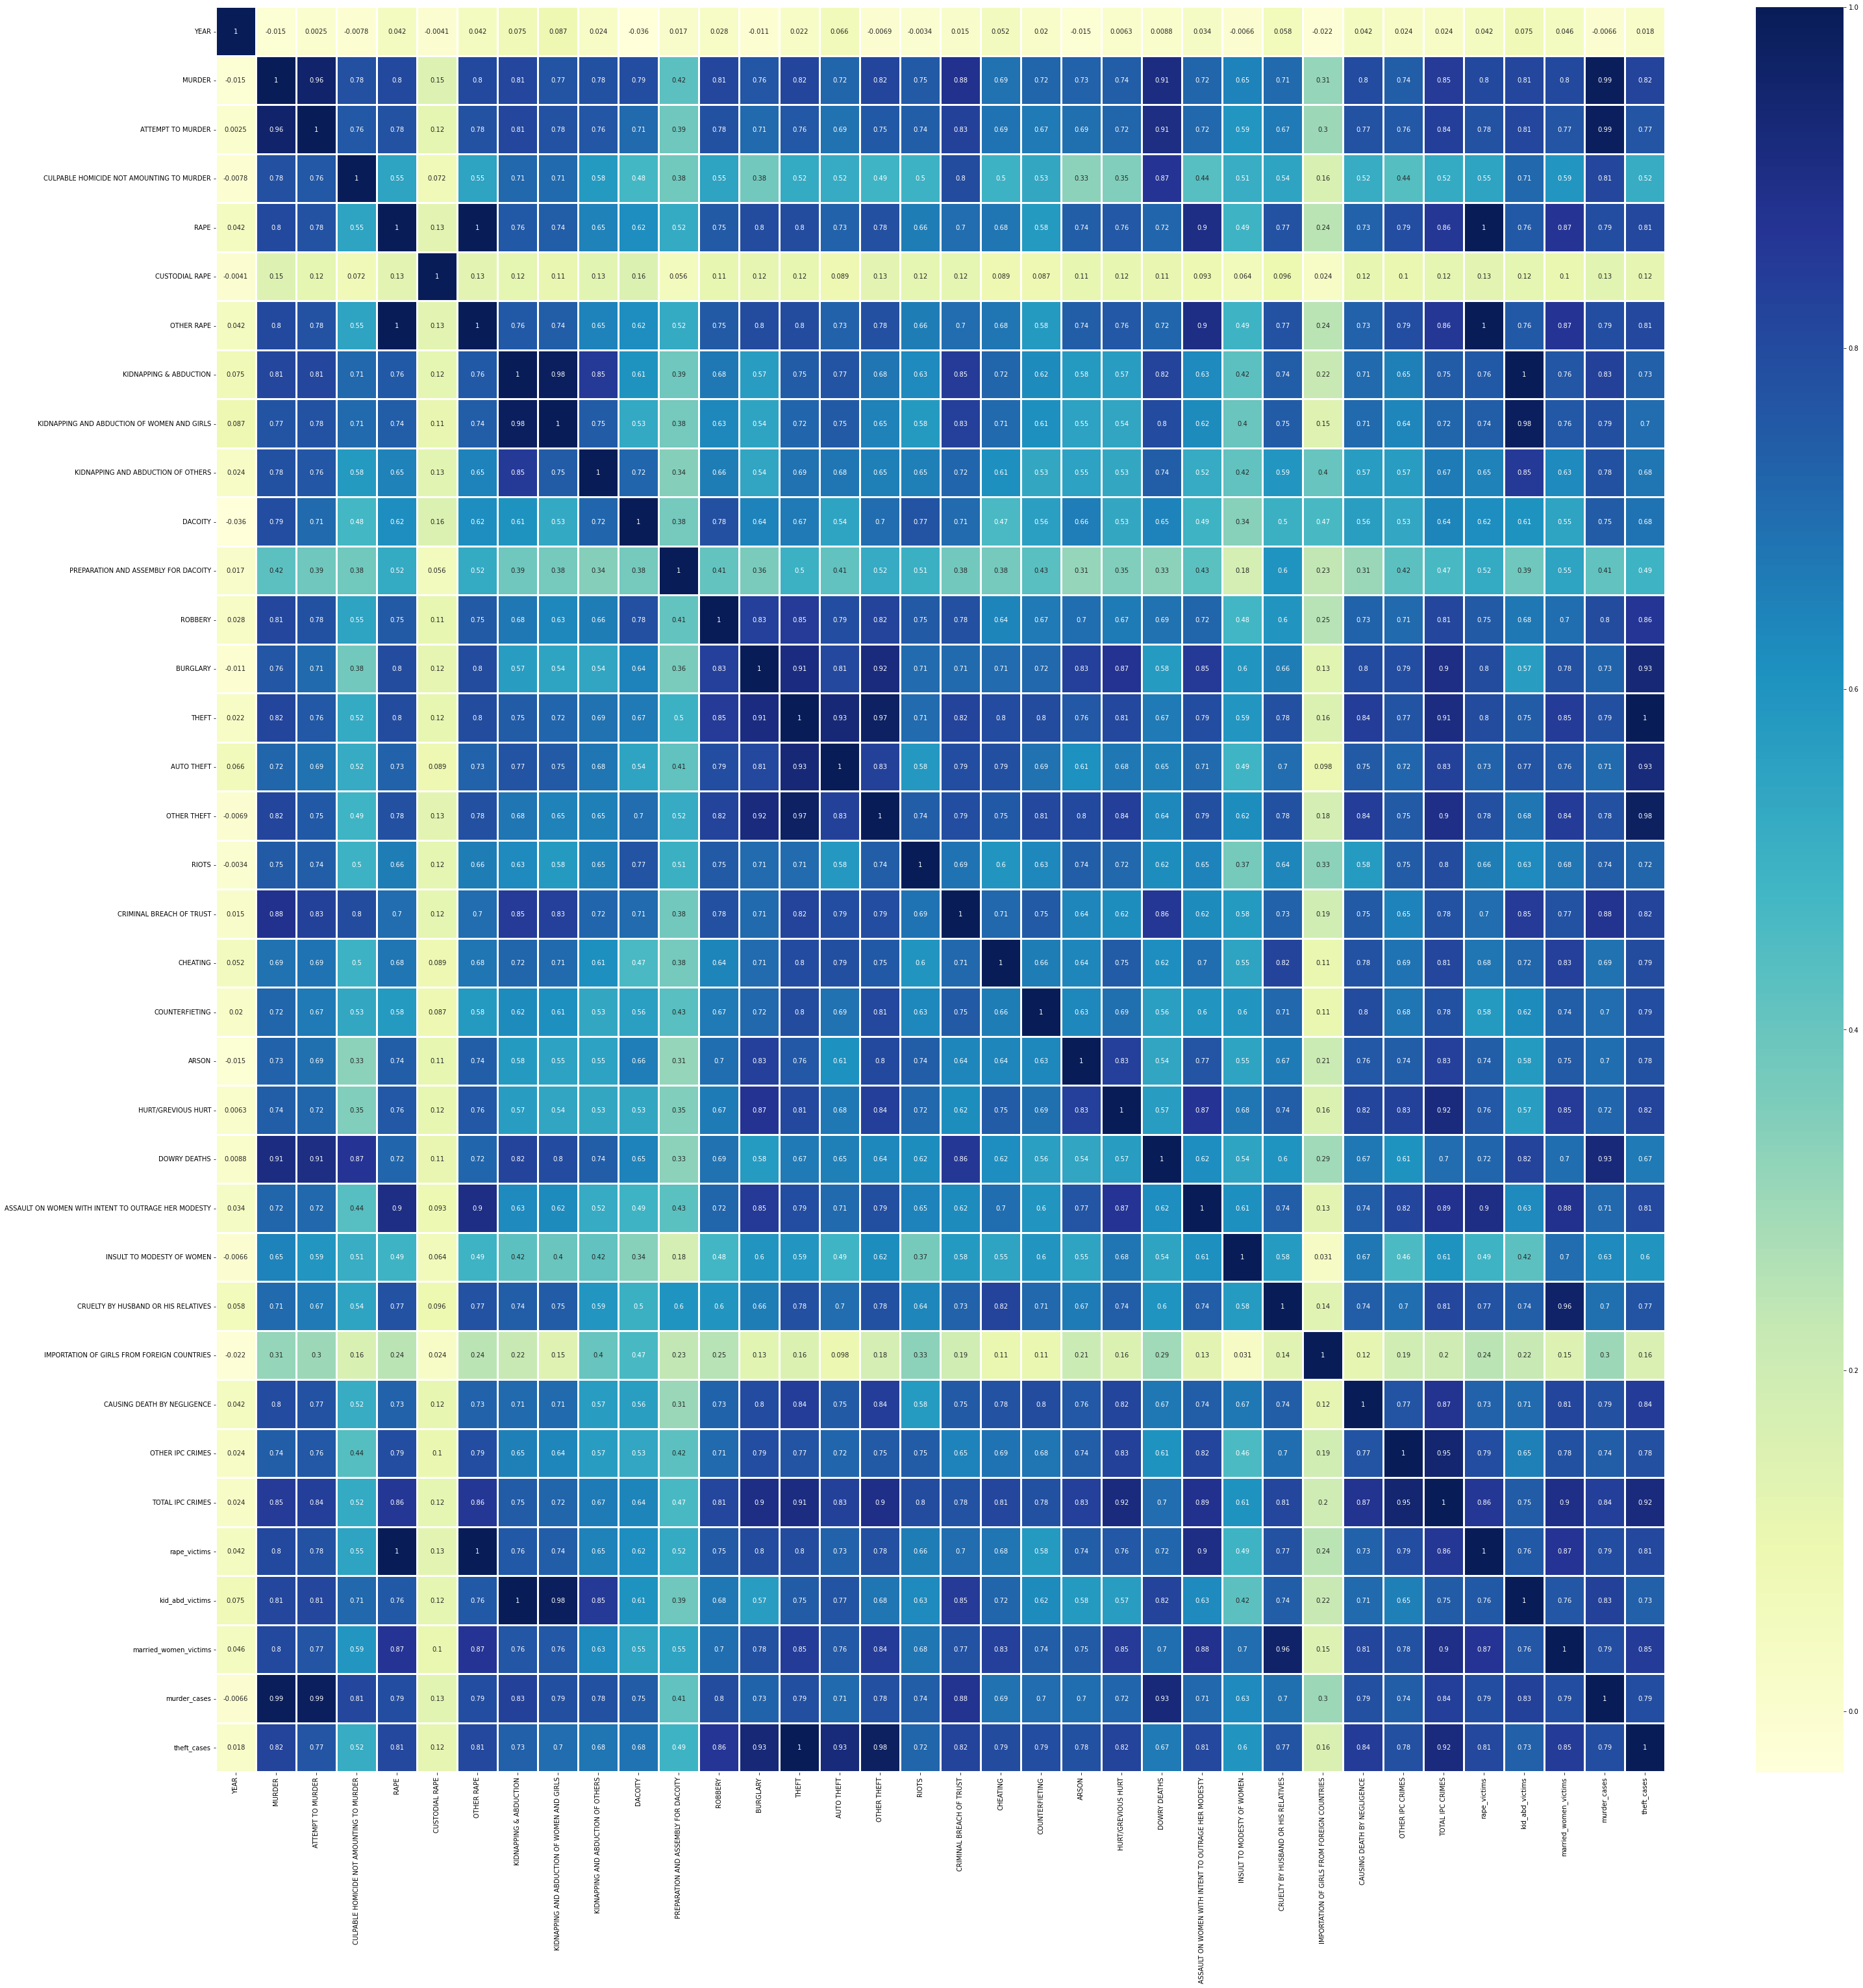

In [27]:
fig, ax = plt.subplots(figsize=(50,50))         # Sample figsize in inches
dataplot = sns.heatmap(ipc.corr(), cmap="YlGnBu",linewidths=2,annot=True)


In [28]:
ipc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT TO MURDER                                    9840 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL RAPE                                       9840 non-null   int64 
 8   OTHER RAPE                                           9840 non-null   int64 
 9

In [29]:
# attributes chosen based on heatmap correlation. >=70 corr was the threshhold taken to ensure higher accuracy.

In [30]:
ipc=ipc.drop(['STATE/UT', 'DISTRICT','YEAR','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','INSULT TO MODESTY OF WOMEN','DOWRY DEATHS','PREPARATION AND ASSEMBLY FOR DACOITY','DACOITY','KIDNAPPING AND ABDUCTION OF OTHERS','CUSTODIAL RAPE','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','rape_victims','kid_abd_victims','married_women_victims','murder_cases','theft_cases','OTHER IPC CRIMES','TOTAL IPC CRIMES','AUTO THEFT','OTHER THEFT'], axis = 1)


In [31]:
ipc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 18 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   MURDER                                               9840 non-null   int64
 1   ATTEMPT TO MURDER                                    9840 non-null   int64
 2   RAPE                                                 9840 non-null   int64
 3   OTHER RAPE                                           9840 non-null   int64
 4   KIDNAPPING & ABDUCTION                               9840 non-null   int64
 5   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS          9840 non-null   int64
 6   ROBBERY                                              9840 non-null   int64
 7   BURGLARY                                             9840 non-null   int64
 8   THEFT                                                9840 non-null   int64
 9   RIOTS   

In [32]:
df_train_y = ipc.iloc[:,8].values
df_train_y

array([199, 366, 723, ...,  56, 538, 594])

In [33]:
ind=[]
for i in range(18):
    if i != 8:
        ind.append(i)

In [34]:
df_train_x = ipc.iloc[:,ind].values
df_train_x

array([[101,  60,  50, ..., 149, 175, 181],
       [151, 125,  23, ..., 118, 154, 270],
       [101,  57,  27, ..., 112, 186, 404],
       ...,
       [  6,   3,   6, ...,   1,   1,  32],
       [ 25,   8,  11, ...,  11,   7, 206],
       [ 31,  11,  17, ...,  12,   8, 238]])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
ipc_train_x, ipc_test_x, ipc_train_y, ipc_test_y = train_test_split(df_train_x, df_train_y, test_size = 0.2, random_state=42)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
neigh = KNeighborsRegressor(n_neighbors=3)

In [39]:
neigh.fit(ipc_train_x, ipc_train_y)

KNeighborsRegressor(n_neighbors=3)

In [40]:
pred_y=neigh.predict(ipc_test_x)

In [41]:
pred_y

array([270.        ,  43.66666667, 126.66666667, ..., 377.33333333,
       415.66666667, 189.66666667])

In [42]:
from sklearn.metrics import r2_score
knn3=r2_score(ipc_test_y,pred_y)
knn3

0.9878566657437935

In [43]:
neigh1 = KNeighborsRegressor(n_neighbors=5)

In [44]:
neigh1.fit(ipc_train_x, ipc_train_y)

KNeighborsRegressor()

In [45]:
pred_y1=neigh1.predict(ipc_test_x)

In [46]:
knn5=r2_score(ipc_test_y,pred_y1)
knn5

0.9829166463052564

In [47]:
neigh2 = KNeighborsRegressor(n_neighbors=2)
neigh2.fit(ipc_train_x, ipc_train_y)
pred_y2=neigh2.predict(ipc_test_x)
knn2=r2_score(ipc_test_y,pred_y2)
knn2

0.9880958452081977

In [48]:
from sklearn.tree import DecisionTreeRegressor 

In [49]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 42) 
  
# fit the regressor with X and Y data
regressor.fit(ipc_train_x, ipc_train_y)

DecisionTreeRegressor(random_state=42)

In [50]:
y_pred_dtr = regressor.predict(ipc_test_x)

In [51]:
dtr=r2_score(ipc_test_y,y_pred_dtr)
dtr

0.9582054524458693

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [54]:
regressor1.fit(ipc_train_x, ipc_train_y)

RandomForestRegressor(random_state=42)

In [55]:
y_pred_rfr = regressor1.predict(ipc_test_x)

In [56]:
rfr=r2_score(ipc_test_y,y_pred_rfr)
rfr

0.9834695368406783

In [74]:
labels=['knn2','knn3','knn5','ID3_reg','random_forest_reg']
scores = [knn2*100,knn3*100,knn5*100,dtr*100,rfr*100]

In [75]:
scores

[98.80958452081977,
 98.78566657437935,
 98.29166463052564,
 95.82054524458692,
 98.34695368406783]

In [76]:
import math

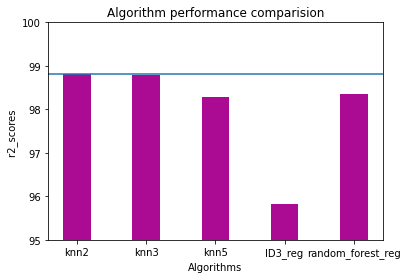

In [78]:
plt.bar(labels, scores, color ='#ab0a93',
        width = 0.4)
low = min(scores)
high = max(scores)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+1)])
plt.axhline(y=max(scores))
plt.xlabel("Algorithms")
plt.ylabel("r2_scores ")
plt.title("Algorithm performance comparision")
plt.show()

In [80]:
# clearly shows KNN with n=2 is the best suited of the regression algorithms implemented, with r2 score decreasing as n increases